Модифицированный алгоритм на базе Pytorch

In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import copy
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch.onnx
import torchvision
%matplotlib inline
plt.ion()  

In [2]:
dir = os.path.abspath(os.curdir)
data_dir=os.path.join(dir, "dsts\\")

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(32),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'test': transforms.Compose([
        transforms.RandomResizedCrop(32),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
}

In [4]:
def get_dataset(data_dir, data_transforms ):
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                              data_transforms[x])
                      for x in ['train', 'test']}
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                                 shuffle=True, num_workers=4)
                  for x in ['train', 'test']}
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
    classes = image_datasets['train'].classes

    return dataloaders["train"], dataloaders['test'], classes, dataset_sizes

In [5]:

trainloader, testloader, classes, dataset_sizes=get_dataset(data_dir,data_transforms)
print('Classes: ',  classes)
print('The datasest have: ',  dataset_sizes ," images")

Classes:  ['airplane', 'bike', 'gitar', 'notebook', 'weapon']
The datasest have:  {'train': 398, 'test': 100}  images


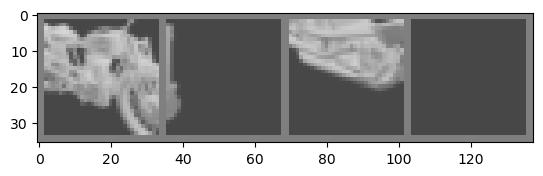

 bike gitar  bike weapon


In [6]:
def imshow(img):
    img = img / 2+0.5   
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.bn2 = nn.BatchNorm2d(32)   
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.bn2(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
import torch.optim as optim
net = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.003)

In [8]:
device = torch.device("cpu")

correct = 0
total = 0
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1) 
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 15 == 14:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 15))
            running_loss = 0.0

    accuracy = correct / total
    print('Accuracy of the network after epoch %d: %d %%' % (epoch + 1, 100 * accuracy))

print('Finished Training')
torch.save(net.state_dict(), 'model.pth')

[1,    15] loss: 1.564
[1,    30] loss: 1.408
[1,    45] loss: 1.297
[1,    60] loss: 1.318
[1,    75] loss: 1.093
[1,    90] loss: 1.126
Accuracy of the network after epoch 1: 45 %
[2,    15] loss: 1.158
[2,    30] loss: 0.968
[2,    45] loss: 0.815
[2,    60] loss: 0.838
[2,    75] loss: 0.854
[2,    90] loss: 1.123
Accuracy of the network after epoch 2: 54 %
[3,    15] loss: 1.202
[3,    30] loss: 0.908
[3,    45] loss: 0.898
[3,    60] loss: 0.988
[3,    75] loss: 0.647
[3,    90] loss: 0.862
Accuracy of the network after epoch 3: 57 %
[4,    15] loss: 1.043
[4,    30] loss: 0.731
[4,    45] loss: 0.891
[4,    60] loss: 0.828
[4,    75] loss: 0.793
[4,    90] loss: 0.885
Accuracy of the network after epoch 4: 61 %
[5,    15] loss: 0.927
[5,    30] loss: 0.607
[5,    45] loss: 0.535
[5,    60] loss: 0.759
[5,    75] loss: 0.801
[5,    90] loss: 0.649
Accuracy of the network after epoch 5: 63 %
[6,    15] loss: 0.914
[6,    30] loss: 0.527
[6,    45] loss: 0.541
[6,    60] loss: 0.48

Accuracy of the network after epoch 44: 82 %
[45,    15] loss: 0.380
[45,    30] loss: 0.266
[45,    45] loss: 0.499
[45,    60] loss: 0.572
[45,    75] loss: 0.447
[45,    90] loss: 0.418
Accuracy of the network after epoch 45: 82 %
[46,    15] loss: 0.222
[46,    30] loss: 0.310
[46,    45] loss: 0.488
[46,    60] loss: 0.336
[46,    75] loss: 0.493
[46,    90] loss: 0.239
Accuracy of the network after epoch 46: 82 %
[47,    15] loss: 0.209
[47,    30] loss: 0.430
[47,    45] loss: 0.389
[47,    60] loss: 0.314
[47,    75] loss: 0.386
[47,    90] loss: 0.364
Accuracy of the network after epoch 47: 82 %
[48,    15] loss: 0.295
[48,    30] loss: 0.180
[48,    45] loss: 0.371
[48,    60] loss: 0.296
[48,    75] loss: 0.258
[48,    90] loss: 0.410
Accuracy of the network after epoch 48: 82 %
[49,    15] loss: 0.335
[49,    30] loss: 0.175
[49,    45] loss: 0.328
[49,    60] loss: 0.290
[49,    75] loss: 0.263
[49,    90] loss: 0.360
Accuracy of the network after epoch 49: 82 %
[50,    15

[88,    30] loss: 0.396
[88,    45] loss: 0.266
[88,    60] loss: 0.418
[88,    75] loss: 0.399
[88,    90] loss: 0.450
Accuracy of the network after epoch 88: 85 %
[89,    15] loss: 0.460
[89,    30] loss: 0.265
[89,    45] loss: 0.378
[89,    60] loss: 0.436
[89,    75] loss: 0.331
[89,    90] loss: 0.324
Accuracy of the network after epoch 89: 85 %
[90,    15] loss: 0.414
[90,    30] loss: 0.396
[90,    45] loss: 0.372
[90,    60] loss: 0.346
[90,    75] loss: 0.427
[90,    90] loss: 0.326
Accuracy of the network after epoch 90: 85 %
[91,    15] loss: 0.277
[91,    30] loss: 0.329
[91,    45] loss: 0.277
[91,    60] loss: 0.251
[91,    75] loss: 0.276
[91,    90] loss: 0.356
Accuracy of the network after epoch 91: 85 %
[92,    15] loss: 0.321
[92,    30] loss: 0.283
[92,    45] loss: 0.294
[92,    60] loss: 0.354
[92,    75] loss: 0.397
[92,    90] loss: 0.419
Accuracy of the network after epoch 92: 85 %
[93,    15] loss: 0.296
[93,    30] loss: 0.300
[93,    45] loss: 0.326
[93,   

Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-1.2724, -1.2925, -4.4733,  5.5335, -3.8226])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-1.8467,  5.0868, -5.3598, -5.0459,  0.4226])
Predict class - bike, real class - airplane, probability (airplane,bike) - tensor([-0.0145,  2.3994, -4.4340, -1.9232, -0.3240])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 7.0582, -2.5668, -6.7369, -0.0835, -3.0138])


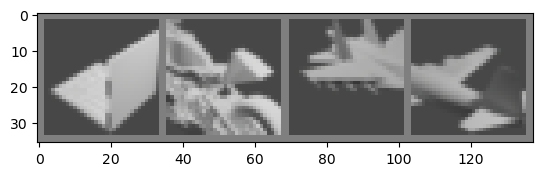

Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-0.7621,  2.9847, -4.7937, -4.6270,  1.3880])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-2.0711, -1.8786,  4.4003, -1.4432, -3.6092])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 8.0305, -2.7320, -6.7924, -2.1090, -4.1450])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-2.4678, -0.8513, -5.0270,  6.5500, -4.2382])


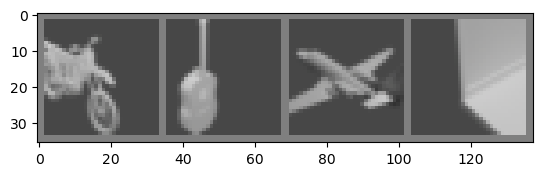

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-0.2254, -0.3089, -5.7494, -5.8715,  4.9562])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-0.7891, -0.9987, -4.5143,  4.9945, -3.3719])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 5.4637, -1.5185, -4.3989, -1.2226, -3.7960])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-0.8611,  1.0560, -4.0662, -4.0141,  3.1401])


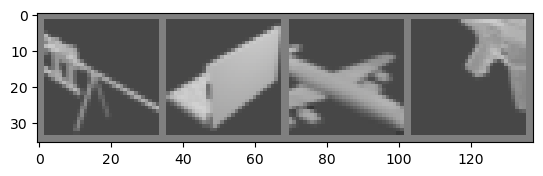

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.7478, -0.2975,  1.7665, -0.6944, -0.5638])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-2.1090,  4.1798, -5.3543, -5.3115,  1.4275])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 9.5645, -3.3015, -7.5615, -0.8653, -5.7404])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.6931, -1.5234,  4.1761, -1.6697, -3.2292])


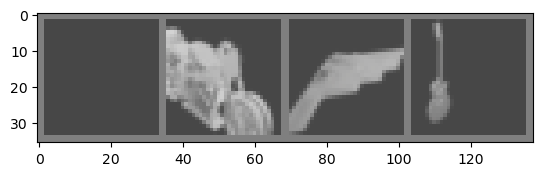

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-0.7114, -0.3848,  1.1685, -0.6220, -0.5825])
Predict class - airplane, real class - bike, probability (airplane,bike) - tensor([ 3.4887, -1.6005, -4.9393,  1.6410, -1.2409])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-0.5718, -3.3459,  5.5647, -2.6843, -6.0083])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.2437, -0.9898,  2.1377, -0.6144, -2.5087])


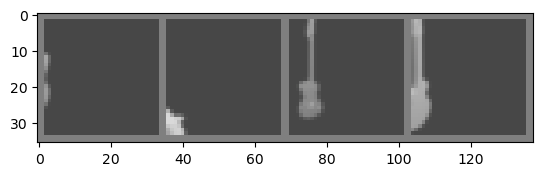

Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 4.8518, -1.5993, -3.4523, -1.2235, -3.5921])
Predict class - airplane, real class - gitar, probability (airplane,bike) - tensor([ 0.1802, -1.5502, -0.4963, -1.2295, -1.7895])
Predict class - weapon, real class - airplane, probability (airplane,bike) - tensor([ 2.0973, -1.0304, -5.1410, -2.6028,  2.5392])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-1.3434,  4.1138, -6.2474, -5.4440,  2.0713])


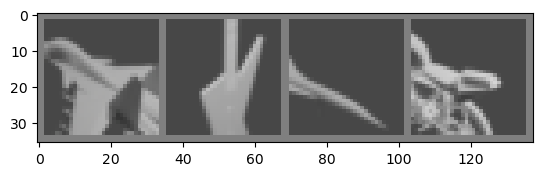

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.1720, -0.0801, -7.5675, -5.5718,  6.0089])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 2.7777, -0.6317, -3.8298, -1.7838,  0.2416])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-0.6465,  1.1912, -3.0495,  0.3132, -1.5782])
Predict class - gitar, real class - weapon, probability (airplane,bike) - tensor([-1.5011, -0.1523,  1.5807, -0.7709, -0.7241])


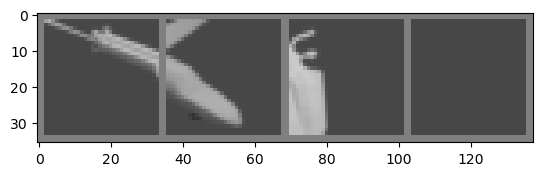

Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 7.6267, -2.6500, -9.2794,  0.7038, -2.2112])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 1.2512, -0.3313, -4.2035, -2.0018,  2.0188])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-1.3079, -1.9288, -2.4657,  4.7753, -3.2658])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-2.9775,  3.4809, -4.4454, -3.1458,  0.5224])


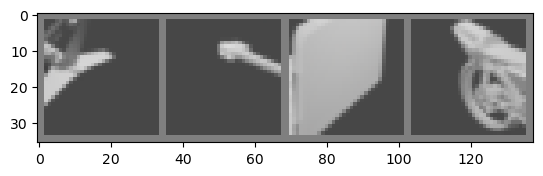

Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-1.5898,  3.3303, -5.0531, -1.8686,  0.1172])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.5550, -1.0712, -4.7784, -4.1003,  3.9953])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-2.2113,  6.5658, -6.9829, -6.0090,  0.4091])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-1.9633, -0.2331, -3.7715,  4.4837, -2.9412])


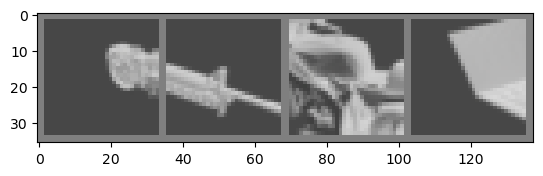

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-0.4933, -1.2478,  3.3705, -2.9055, -3.0593])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-1.2525, -1.3910, -3.0590,  3.8901, -1.7994])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-0.5205, -1.1905, -5.3392,  5.2796, -3.2567])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.3310, -1.7009,  3.8776, -2.8971, -1.4718])


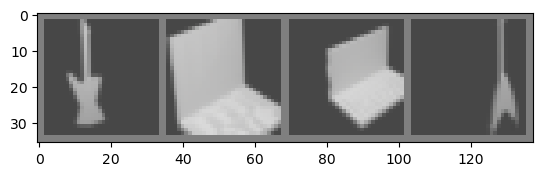

Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-1.9107,  4.9390, -5.8193, -3.6935, -0.3868])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 1.0581, -1.5068, -6.3672, -4.8091,  5.0811])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-2.4103,  3.0124, -4.0036, -1.0346, -0.4250])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 7.9469, -2.5125, -6.7945, -0.7675, -4.6896])


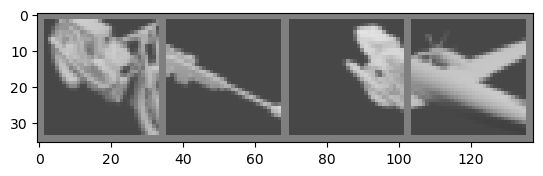

Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 4.8839, -2.2151, -4.1114,  0.9099, -4.2069])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-1.5856,  0.7511, -5.4318, -5.4306,  4.8536])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.4832, -0.1559,  1.6094, -0.7344, -0.7910])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.4908,  0.0368,  1.2936, -0.6655, -0.7047])


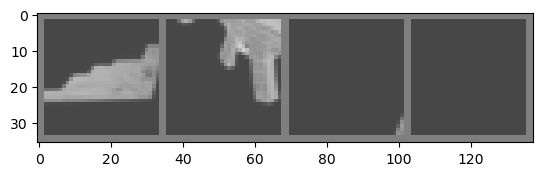

Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 0.9573, -1.3675, -5.2150,  4.6552, -3.8458])
Predict class - bike, real class - weapon, probability (airplane,bike) - tensor([-3.4203,  4.4787, -9.3443, -7.6490,  4.1116])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-0.4953,  1.2936, -7.0083, -5.6353,  4.7409])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-2.6668, -1.1974,  3.9249, -1.8237, -1.0978])


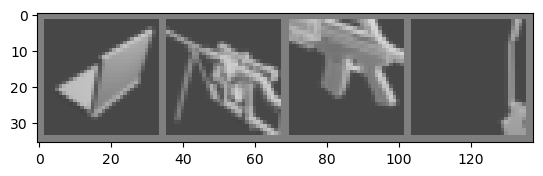

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.9609,  0.0911,  1.4656, -0.6717, -0.7784])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([  9.1939,  -1.5953, -11.9533,  -1.5432,  -2.3605])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.9609,  0.0911,  1.4656, -0.6717, -0.7784])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 1.1723,  0.1241, -3.0560, -3.5647,  0.5728])


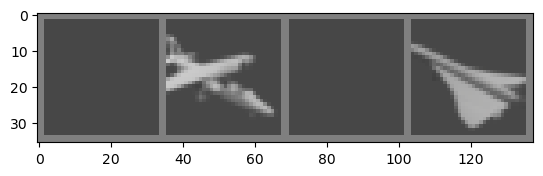

Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-2.1157,  5.5560, -8.8298, -3.4452,  0.3292])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.7228, -0.7845,  2.5817, -0.9700, -1.4823])
Predict class - airplane, real class - weapon, probability (airplane,bike) - tensor([ 0.6976, -0.3586, -1.0688,  0.4238, -0.4518])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 1.8500, -1.3723, -8.6666, -6.3793,  5.6889])


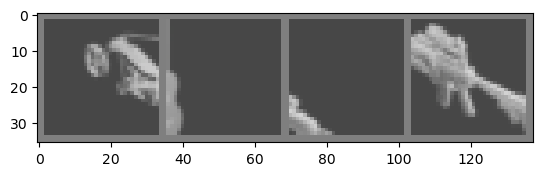

Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-0.8521,  5.1189, -6.5229, -5.9717,  1.1075])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 2.6327, -1.8685, -5.0870,  3.7465, -4.0980])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-0.6794,  0.5828, -5.2823, -4.2782,  4.3015])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-2.9304, -1.6113,  4.9121, -2.9019, -1.3101])


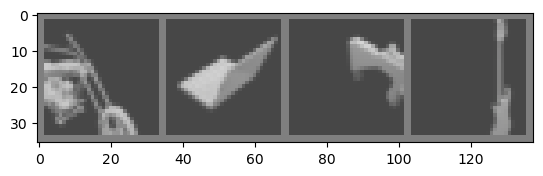

Predict class - airplane, real class - notebook, probability (airplane,bike) - tensor([ 3.2745, -3.1046, -4.9768,  3.1260, -3.4453])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-2.8100,  6.4353, -7.1779, -5.2467, -0.1207])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 4.3428, -1.2403, -6.2770, -2.0795,  0.5047])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-2.3356, -1.2116, -5.1757,  6.8023, -4.4349])


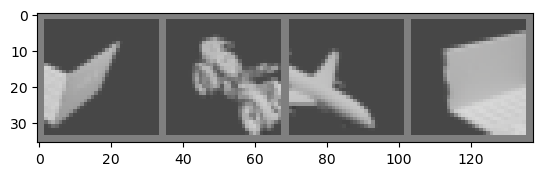

Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-2.0644,  5.5989, -9.9037, -5.7782,  1.9668])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-0.0894, -2.2846, -5.4083,  6.1759, -3.5863])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-1.1051,  0.0478,  0.1266, -1.5660,  0.7298])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.4092, -0.5886,  2.0118, -0.9524, -0.6859])


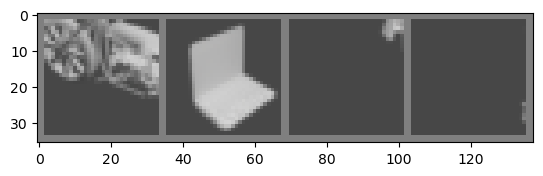

Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 7.7444, -2.0426, -9.1417, -0.0914, -2.0435])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-2.9830,  2.5108, -3.8735,  1.6187, -2.0888])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 6.0305, -2.8841, -5.8090, -1.4807, -2.1482])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-2.2906, -0.5104,  2.4483, -1.1007, -0.7445])


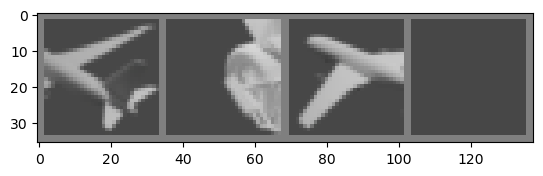

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.3011, -2.4171,  5.1301, -2.6749, -4.2129])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-0.3585, -0.8176, -6.1841, -5.0007,  5.4953])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 5.6865, -2.5044, -7.0986, -0.8257, -0.0221])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-1.2054,  2.0657, -6.5922, -5.4419,  3.6042])


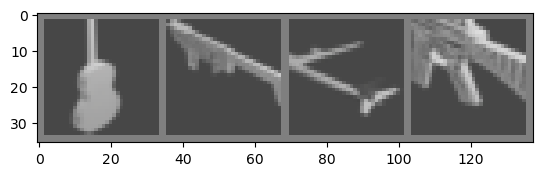

Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 5.1285, -2.2481, -7.0369,  0.0988, -0.2365])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-1.5359,  0.2739, -1.9338, -3.5912,  2.9298])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-1.6439,  4.6018, -5.3525, -3.3891, -0.2791])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-0.8965,  2.2697, -3.2380, -1.0871, -0.5639])


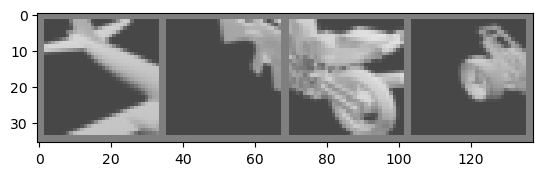

Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-1.9832, -0.5255, -2.5025,  3.9813, -4.3504])
Predict class - airplane, real class - notebook, probability (airplane,bike) - tensor([ 5.3642, -2.3921, -7.1178,  1.0456, -2.0344])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.9090, -0.3023,  2.1939, -1.2253, -0.9994])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-0.7432,  0.4325, -6.7990, -7.1442,  5.4395])


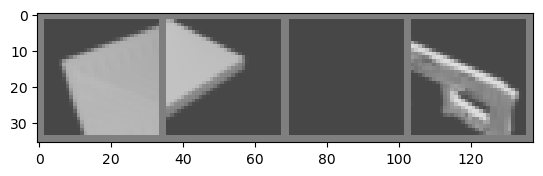

Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-1.0685, -1.7097, -3.1574,  4.4185, -2.4281])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-2.7312,  7.1570, -9.1366, -7.6184,  1.4681])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-0.3592, -0.2621, -5.4112, -4.6414,  4.4018])
Predict class - bike, real class - notebook, probability (airplane,bike) - tensor([ 0.8427,  1.5908, -5.4761,  0.4768, -2.0236])


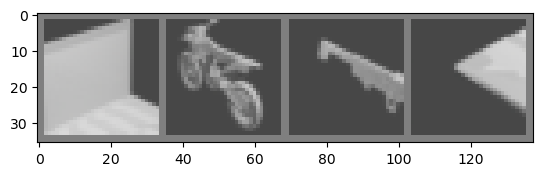

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-2.0343,  1.1696, -1.4586, -2.7530,  1.4825])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 4.1938, -2.7747, -1.4604, -1.0780, -3.2474])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-0.6047, -0.1639, -5.8557,  4.5201, -3.1098])
Predict class - airplane, real class - notebook, probability (airplane,bike) - tensor([ 2.5679, -0.5529, -4.5405, -1.1853,  0.2366])


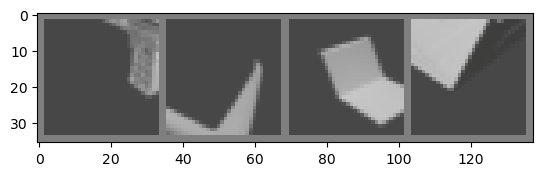

Predict class - gitar, real class - airplane, probability (airplane,bike) - tensor([-1.4787, -0.7296,  2.0981, -1.1372, -0.5504])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-1.1470, -2.8504, -3.0395,  6.0094, -4.4993])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-0.4538, -1.7892, -4.5864,  5.8220, -4.6791])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-1.2298,  6.6213, -9.5032, -5.9514,  0.4256])


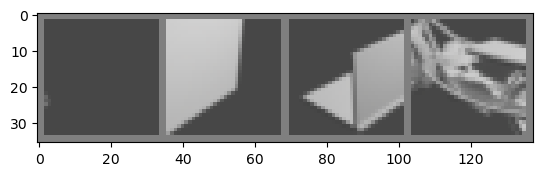

Accuracy of the network on the 100 test images: 88 %


In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        for printdata in list(zip(predicted,labels,outputs)):
            printclass =[classes[int(printdata[0])],classes[int(printdata[1])]]
            print('Predict class - {0}, real class - {1}, probability ({2},{3}) - {4}'.format( printclass[0],printclass[1],
                                                                              classes[0], classes [1],printdata[2]))

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        imshow(torchvision.utils.make_grid(images))
print('Accuracy of the network on the', dataset_sizes['test'], 'test images: %d %%' % (
    100 * correct / total))

In [10]:

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 90.0 %
Accuracy for class: bike  is 90.0 %
Accuracy for class: gitar is 90.0 %
Accuracy for class: notebook is 70.0 %
Accuracy for class: weapon is 85.0 %
